In [1]:
import numpy as np
import scipy

In [2]:
def gradient(gradient_f,values):
    grad = []
    for function in gradient_f:
        gradient = function(*values)
        grad.append(gradient)
#     print('gradient--->',grad)
    return np.array(grad)
    

In [3]:
def derivative_of_a_function(function,x):
    h = 1e-5
    
    function = np.vectorize(function)
    
    return (function(*(x+h))-function(*(x-h)))/(2*h)

temp = lambda x,y: x**3 + y * 2

derivative_of_a_function(temp,np.array([2,1]))

14.000000000180533

In [4]:
def descent_direction(gradient_f,values):
    grad = gradient(gradient_f,values)
    grad_square = np.array([g*g for g in grad])
#     print('grad square calculated ---> {}'.format(grad_square))
    p =  -np.sum(grad_square)
    return p

In [5]:
def armijo_step_algorithm(f,gradient,negative_grad,values,delta):
    ro = 1
    eta = 2
    descent = descent_direction(gradient,values)
    while f(*(values+ro*negative_grad)) <= f(*values)+ro*delta*descent:
        ro *= 2
    
    while f(*(values+ro*negative_grad)) > f(*values)+ro*delta*descent:
        ro /= 2
    return ro

In [6]:
f = lambda x,y : 100*(y-x*x)**2 + (1-x)**2
dfx = lambda x,y: -400*x*(y-x*x) + 2*x - 2
dfy = lambda x,y: 200*(y-x*x)

# f = lambda x,y: (x-2)**4 + (x-2*y)**2
# dfx = lambda x,y: 4*(x-2)**3+2*(x-2*y)
# dfy = lambda x,y: -4*(x-2*y)

# f = lambda x,y : 4*x*x+y*y
# dfx = lambda x,y: 8*x+y*0
# dfy = lambda x,y: 2*y+x*0
negative_grad = gradient(np.array([dfx,dfy]),np.array([1,2]))
# negative_grad = np.array([-400,-200])
delta = 10e-4
step_size = armijo_step_algorithm(f,np.array([dfx,dfy]),negative_grad,np.array([1,2]),delta)
print(step_size)

1.0842021724855044e-19


C:\Users\Mithun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in long_scalars
  """Entry point for launching an IPython kernel.


In [7]:
print(dfx(1,1))
print(dfy(1,1))

0
0


In [8]:
from numpy import linalg as LA
def general_descent(accuracy,function,gradient_f,initial):
    xk = initial
    counter = 0
    xk1 = 0
    delta = 10**(-4)
    while True:
        print(LA.norm(gradient(gradient_f,xk)))
        dk = -gradient(gradient_f,xk)
        step_size = armijo_step_algorithm(function,gradient_f,dk,xk,delta)
        xk1 = xk + step_size*dk
        xk = xk1
        print('xk1 at iterate: {}--->: {}'.format(counter,xk1))
        print('dk at iterate: {}--->: {}'.format(counter,dk))
        print('step_size at iterate: {}--->: {}'.format(counter,step_size))
        counter += 1
        if LA.norm(gradient(gradient_f,xk))<=0.0001:
            break
    return xk1

In [9]:
general_descent(10,f,np.array([dfx,dfy]),np.array([1,2]))

C:\Users\Mithun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in long_scalars
  """Entry point for launching an IPython kernel.


447.21359549995793
xk1 at iterate: 0--->: [1.390625  1.8046875]
dk at iterate: 0--->: [ 400 -200]
step_size at iterate: 0--->: 0.0009765625
77.078045241646
xk1 at iterate: 1--->: [1.3197059  1.82991219]
dk at iterate: 1--->: [-72.62115479  25.83007812]
step_size at iterate: 1--->: 0.0009765625
49.24141575178425
xk1 at iterate: 2--->: [1.3645951  1.81266834]
dk at iterate: 2--->: [ 45.96653737 -17.65770277]
step_size at iterate: 2--->: 0.0009765625
29.433128433325837
xk1 at iterate: 3--->: [1.33752315 1.82232682]
dk at iterate: 3--->: [-27.72167391   9.89029043]
step_size at iterate: 3--->: 0.0009765625
18.42265230726011
xk1 at iterate: 4--->: [1.35429281 1.81581146]
dk at iterate: 4--->: [17.17213356 -6.67172745]
step_size at iterate: 4--->: 0.0009765625
11.23348059122725
xk1 at iterate: 5--->: [1.34392105 1.81938521]
dk at iterate: 5--->: [-10.62068977   3.65951293]
step_size at iterate: 5--->: 0.0009765625
6.965783625067515
xk1 at iterate: 6--->: [1.35021117 1.81679508]
dk at iterate

dk at iterate: 256--->: [ 0.09868968 -0.27967325]
step_size at iterate: 256--->: 0.001953125
0.46374315601010846
xk1 at iterate: 257--->: [1.31950032 1.74253953]
dk at iterate: 257--->: [-0.45863169 -0.06866357]
step_size at iterate: 257--->: 0.0009765625
0.31965247044520506
xk1 at iterate: 258--->: [1.31975571 1.74196983]
dk at iterate: 258--->: [ 0.13075701 -0.29168529]
step_size at iterate: 258--->: 0.001953125
0.5279186126745227
xk1 at iterate: 259--->: [1.31924187 1.7419279 ]
dk at iterate: 259--->: [-0.52616934 -0.04294055]
step_size at iterate: 259--->: 0.0009765625
0.3489920444182066
xk1 at iterate: 260--->: [1.31957048 1.74133071]
dk at iterate: 260--->: [ 0.16825054 -0.30575677]
step_size at iterate: 260--->: 0.001953125
0.6052591252628263
xk1 at iterate: 261--->: [1.31897955 1.74131813]
dk at iterate: 261--->: [-0.60512185 -0.01289023]
step_size at iterate: 261--->: 0.0009765625
0.38572459558880823
xk1 at iterate: 262--->: [1.31918661 1.74100346]
dk at iterate: 262--->: [ 0.

0.5590477874397481
xk1 at iterate: 582--->: [1.28334339 1.64747315]
dk at iterate: 582--->: [ 0.40980531 -0.38025522]
step_size at iterate: 582--->: 0.0009765625
0.3245083213419384
xk1 at iterate: 583--->: [1.2827408  1.64727671]
dk at iterate: 583--->: [-0.3085274  -0.10058079]
step_size at iterate: 583--->: 0.001953125
0.5344710673966551
xk1 at iterate: 584--->: [1.28311693 1.64691484]
dk at iterate: 584--->: [ 0.38516293 -0.37055207]
step_size at iterate: 584--->: 0.0009765625
0.31447993665554613
xk1 at iterate: 585--->: [1.28253807 1.64670946]
dk at iterate: 585--->: [-0.2963777 -0.1051565]
step_size at iterate: 585--->: 0.001953125
0.5107546291343573
xk1 at iterate: 586--->: [1.28289081 1.64635681]
dk at iterate: 586--->: [ 0.36120398 -0.36111213]
step_size at iterate: 586--->: 0.0009765625
0.3049533358932073
xk1 at iterate: 587--->: [1.28233499 1.64614275]
dk at iterate: 587--->: [-0.28457853 -0.10959744]
step_size at iterate: 587--->: 0.001953125
0.4879326920067548
xk1 at iterat

0.6016627385274698
xk1 at iterate: 647--->: [1.27536697 1.62798123]
dk at iterate: 647--->: [-0.60135071  0.01937462]
step_size at iterate: 647--->: 0.0009765625
0.3330376891872878
xk1 at iterate: 648--->: [1.2757065  1.62742641]
dk at iterate: 648--->: [ 0.17384158 -0.2840655 ]
step_size at iterate: 648--->: 0.001953125
0.5517523311120911
xk1 at iterate: 649--->: [1.27516768 1.62742654]
dk at iterate: 649--->: [-5.51752315e-01  1.32990501e-04]
step_size at iterate: 649--->: 0.0009765625
0.3132818197960058
xk1 at iterate: 650--->: [1.27546155 1.62688985]
dk at iterate: 650--->: [ 0.15046034 -0.27478571]
step_size at iterate: 650--->: 0.001953125
0.5064888610308516
xk1 at iterate: 651--->: [1.27496723 1.62687272]
dk at iterate: 651--->: [-0.50618513 -0.01753795]
step_size at iterate: 651--->: 0.0009765625
0.29586638983745306
xk1 at iterate: 652--->: [1.2752192  1.62635269]
dk at iterate: 652--->: [ 0.12900825 -0.26625888]
step_size at iterate: 652--->: 0.001953125
0.46561610300713235
xk

0.48455341536796764
xk1 at iterate: 898--->: [1.24686873 1.55519173]
dk at iterate: 898--->: [ 0.34787196 -0.33730863]
step_size at iterate: 898--->: 0.0009765625
0.2601689822845003
xk1 at iterate: 899--->: [1.24640129 1.55499247]
dk at iterate: 899--->: [-0.23933319 -0.10201727]
step_size at iterate: 899--->: 0.001953125
0.3825416349574625
xk1 at iterate: 900--->: [1.24663881 1.55470413]
dk at iterate: 900--->: [ 0.24322583 -0.29526141]
step_size at iterate: 900--->: 0.0009765625
0.22953060045052898
xk1 at iterate: 901--->: [1.24625566 1.5544714 ]
dk at iterate: 901--->: [-0.19617571 -0.11916118]
step_size at iterate: 901--->: 0.001953125
0.31082731798936675
xk1 at iterate: 902--->: [1.2465772  1.55395646]
dk at iterate: 902--->: [ 0.16463227 -0.26364718]
step_size at iterate: 902--->: 0.001953125
0.4922888720662863
xk1 at iterate: 903--->: [1.24609645 1.55395612]
dk at iterate: 903--->: [-4.92288750e-01 -3.47213971e-04]
step_size at iterate: 903--->: 0.0009765625
0.2622438541350322
x

xk1 at iterate: 957--->: [1.2397621  1.53854653]
dk at iterate: 957--->: [-0.2617052  -0.08822302]
step_size at iterate: 957--->: 0.001953125
0.41735445162844614
xk1 at iterate: 958--->: [1.2400379  1.53824644]
dk at iterate: 958--->: [ 0.28241232 -0.30729143]
step_size at iterate: 958--->: 0.0009765625
0.23380472650887035
xk1 at iterate: 959--->: [1.23963546 1.53803064]
dk at iterate: 959--->: [-0.20604941 -0.11049113]
step_size at iterate: 959--->: 0.001953125
0.323331640569461
xk1 at iterate: 960--->: [1.23999187 1.53750932]
dk at iterate: 960--->: [ 0.18248271 -0.26691461]
step_size at iterate: 960--->: 0.001953125
0.5151507104928904
xk1 at iterate: 961--->: [1.23948898 1.5375231 ]
dk at iterate: 961--->: [-0.51495764  0.01410247]
step_size at iterate: 961--->: 0.0009765625
0.2626829710373008
xk1 at iterate: 962--->: [1.23970597 1.53705819]
dk at iterate: 962--->: [ 0.11109889 -0.23803231]
step_size at iterate: 962--->: 0.001953125
0.3883468824441035
xk1 at iterate: 963--->: [1.239

step_size at iterate: 1228--->: 0.0009765625
0.18997773017462932
xk1 at iterate: 1229--->: [1.20910188 1.46351639]
dk at iterate: 1229--->: [-0.15555454 -0.10906109]
step_size at iterate: 1229--->: 0.00390625
0.4729973444103995
xk1 at iterate: 1230--->: [1.20944399 1.46320603]
dk at iterate: 1230--->: [ 0.35032068 -0.31780797]
step_size at iterate: 1230--->: 0.0009765625
0.21994387896611267
xk1 at iterate: 1231--->: [1.20905224 1.46302976]
dk at iterate: 1231--->: [-0.20057284 -0.09025434]
step_size at iterate: 1231--->: 0.001953125
0.2995521914265101
xk1 at iterate: 1232--->: [1.2093903  1.46255225]
dk at iterate: 1232--->: [ 0.17308562 -0.24448493]
step_size at iterate: 1232--->: 0.001953125
0.4541621324991329
xk1 at iterate: 1233--->: [1.20894701 1.46256644]
dk at iterate: 1233--->: [-0.45392959  0.0145317 ]
step_size at iterate: 1233--->: 0.0009765625
0.21519968866158853
xk1 at iterate: 1234--->: [1.20908811 1.46217052]
dk at iterate: 1234--->: [ 0.07224156 -0.20271177]
step_size a

0.20294943192317133
xk1 at iterate: 1285--->: [1.20305793 1.44848041]
dk at iterate: 1285--->: [-0.17967067 -0.0943765 ]
step_size at iterate: 1285--->: 0.001953125
0.2654833023407568
xk1 at iterate: 1286--->: [1.20332871 1.44803821]
dk at iterate: 1286--->: [ 0.13864271 -0.22640579]
step_size at iterate: 1286--->: 0.001953125
0.3883395074619336
xk1 at iterate: 1287--->: [1.20294955 1.44803074]
dk at iterate: 1287--->: [-0.3882643 -0.0076426]
step_size at iterate: 1287--->: 0.0009765625
0.1946151133530278
xk1 at iterate: 1288--->: [1.20313671 1.44729393]
dk at iterate: 1288--->: [ 0.04791337 -0.1886249 ]
step_size at iterate: 1288--->: 0.00390625
0.5259775115395889
xk1 at iterate: 1289--->: [1.20262528 1.44734159]
dk at iterate: 1289--->: [-0.52370845  0.04880369]
step_size at iterate: 1289--->: 0.0009765625
0.2264154710297294
xk1 at iterate: 1290--->: [1.2028053  1.44693767]
dk at iterate: 1290--->: [ 0.09216967 -0.20680599]
step_size at iterate: 1290--->: 0.001953125
0.31327643412283

0.22231708502987424
xk1 at iterate: 1568--->: [1.1716766  1.37291204]
dk at iterate: 1568--->: [ 0.1098803 -0.1932646]
step_size at iterate: 1568--->: 0.001953125
0.3035387867278003
xk1 at iterate: 1569--->: [1.17138065 1.37289524]
dk at iterate: 1569--->: [-0.30305116 -0.01719844]
step_size at iterate: 1569--->: 0.0009765625
0.15321817092042472
xk1 at iterate: 1570--->: [1.17143755 1.37229945]
dk at iterate: 1570--->: [ 0.01456646 -0.15252418]
step_size at iterate: 1570--->: 0.00390625
0.32723878481434804
xk1 at iterate: 1571--->: [1.17111805 1.3722929 ]
dk at iterate: 1571--->: [-0.32717012 -0.00670329]
step_size at iterate: 1571--->: 0.0009765625
0.15650075268356425
xk1 at iterate: 1572--->: [1.17120011 1.3716871 ]
dk at iterate: 1572--->: [ 0.02100802 -0.15508433]
step_size at iterate: 1572--->: 0.00390625
0.35301358536031685
xk1 at iterate: 1573--->: [1.1708554  1.37169151]
dk at iterate: 1573--->: [-0.35298466  0.00451863]
step_size at iterate: 1573--->: 0.0009765625
0.1602746731

0.4311917635685745
xk1 at iterate: 1625--->: [1.16465209 1.35721986]
dk at iterate: 1625--->: [-0.42909547  0.0424666 ]
step_size at iterate: 1625--->: 0.0009765625
0.16748633426938905
xk1 at iterate: 1626--->: [1.16474172 1.35690526]
dk at iterate: 1626--->: [ 0.04589181 -0.16107642]
step_size at iterate: 1626--->: 0.001953125
0.20597655403729004
xk1 at iterate: 1627--->: [1.16435479 1.35679511]
dk at iterate: 1627--->: [-0.19810501 -0.05639809]
step_size at iterate: 1627--->: 0.001953125
0.2744267892530707
xk1 at iterate: 1628--->: [1.16468886 1.35637596]
dk at iterate: 1628--->: [ 0.17104124 -0.21460419]
step_size at iterate: 1628--->: 0.001953125
0.38802562011173863
xk1 at iterate: 1629--->: [1.16431071 1.35640021]
dk at iterate: 1629--->: [-0.38722998  0.02483593]
step_size at iterate: 1629--->: 0.0009765625
0.1600363405668873
xk1 at iterate: 1630--->: [1.16444748 1.35579022]
dk at iterate: 1630--->: [ 0.03501394 -0.15615907]
step_size at iterate: 1630--->: 0.00390625
0.3987921989

0.44811712897495626
xk1 at iterate: 1896--->: [1.13305446 1.28412889]
dk at iterate: 1896--->: [ 0.35477135 -0.27376312]
step_size at iterate: 1896--->: 0.0009765625
0.13804000047878445
xk1 at iterate: 1897--->: [1.13257527 1.28388164]
dk at iterate: 1897--->: [-0.12267288 -0.06329618]
step_size at iterate: 1897--->: 0.00390625
0.34632846138570655
xk1 at iterate: 1898--->: [1.13282727 1.28365607]
dk at iterate: 1898--->: [ 0.25805367 -0.23097988]
step_size at iterate: 1898--->: 0.0009765625
0.1256843148990018
xk1 at iterate: 1899--->: [1.13242401 1.28337604]
dk at iterate: 1899--->: [-0.1032347  -0.07168783]
step_size at iterate: 1899--->: 0.00390625
0.27088027532585873
xk1 at iterate: 1900--->: [1.13260414 1.28318231]
dk at iterate: 1900--->: [ 0.18445025 -0.198379  ]
step_size at iterate: 1900--->: 0.0009765625
0.11794792636895007
xk1 at iterate: 1901--->: [1.13191317 1.28257267]
dk at iterate: 1901--->: [-0.08844397 -0.07803446]
step_size at iterate: 1901--->: 0.0078125
0.4377039609

xk1 at iterate: 1952--->: [1.12696758 1.27041623]
dk at iterate: 1952--->: [ 0.2221445  -0.21106967]
step_size at iterate: 1952--->: 0.0009765625
0.11647948685559724
xk1 at iterate: 1953--->: [1.12661011 1.27013474]
dk at iterate: 1953--->: [-0.09151274 -0.07206171]
step_size at iterate: 1953--->: 0.00390625
0.22892944443534083
xk1 at iterate: 1954--->: [1.12689396 1.26978927]
dk at iterate: 1954--->: [ 0.14533279 -0.17688151]
step_size at iterate: 1954--->: 0.001953125
0.29986942215409657
xk1 at iterate: 1955--->: [1.12660178 1.26980894]
dk at iterate: 1955--->: [-0.29919195  0.02014565]
step_size at iterate: 1955--->: 0.0009765625
0.11568511893423129
xk1 at iterate: 1956--->: [1.12662906 1.26935787]
dk at iterate: 1956--->: [ 0.00698323 -0.11547416]
step_size at iterate: 1956--->: 0.00390625
0.2244147383592609
xk1 at iterate: 1957--->: [1.12619148 1.26933254]
dk at iterate: 1957--->: [-0.22403979 -0.01296715]
step_size at iterate: 1957--->: 0.001953125
0.29314526891415776
xk1 at iter

xk1 at iterate: 2209--->: [1.09635297 1.20244733]
dk at iterate: 2209--->: [-0.33456801  0.06438007]
step_size at iterate: 2209--->: 0.0009765625
0.09184101433986552
xk1 at iterate: 2210--->: [1.09638392 1.20208991]
dk at iterate: 2210--->: [ 0.00792353 -0.09149858]
step_size at iterate: 2210--->: 0.00390625
0.1787587900759349
xk1 at iterate: 2211--->: [1.09603501 1.20207733]
dk at iterate: 2211--->: [-0.17864269 -0.0064417 ]
step_size at iterate: 2211--->: 0.001953125
0.21839851909493688
xk1 at iterate: 2212--->: [1.0963317  1.20177085]
dk at iterate: 2212--->: [ 0.15190401 -0.15691745]
step_size at iterate: 2212--->: 0.001953125
0.2704455618060762
xk1 at iterate: 2213--->: [1.09606974 1.20180451]
dk at iterate: 2213--->: [-0.26824011  0.034468  ]
step_size at iterate: 2213--->: 0.0009765625
0.08713293240296563
xk1 at iterate: 2214--->: [1.09606077 1.20112384]
dk at iterate: 2214--->: [-0.00114854 -0.08712536]
step_size at iterate: 2214--->: 0.0078125
0.29440028072890734
xk1 at iterat

0.20622186662286113
xk1 at iterate: 2559--->: [1.05315896 1.10937725]
dk at iterate: 2559--->: [-0.20127722  0.04488806]
step_size at iterate: 2559--->: 0.0009765625
0.04736623803951826
xk1 at iterate: 2560--->: [1.05303438 1.10864772]
dk at iterate: 2560--->: [-0.00797321 -0.04669035]
step_size at iterate: 2560--->: 0.015625
0.20977611535318855
xk1 at iterate: 2561--->: [1.05283467 1.10869336]
dk at iterate: 2561--->: [-0.20450314  0.04673845]
step_size at iterate: 2561--->: 0.0009765625
0.047144156120111275
xk1 at iterate: 2562--->: [1.05271358 1.10796675]
dk at iterate: 2562--->: [-0.00774978 -0.04650282]
step_size at iterate: 2562--->: 0.015625
0.21159756595618107
xk1 at iterate: 2563--->: [1.05251229 1.10801346]
dk at iterate: 2563--->: [-0.20612177  0.04782621]
step_size at iterate: 2563--->: 0.0009765625
0.046892381783730196
xk1 at iterate: 2564--->: [1.05239306 1.10729053]
dk at iterate: 2564--->: [-0.00763065 -0.04626736]
step_size at iterate: 2564--->: 0.015625
0.211623677807

step_size at iterate: 2873--->: 0.001953125
0.21356261253852346
xk1 at iterate: 2874--->: [1.01331614 1.02639181]
dk at iterate: 2874--->: [ 0.18615207 -0.10467281]
step_size at iterate: 2874--->: 0.001953125
0.21304015987323194
xk1 at iterate: 2875--->: [1.01293338 1.02655501]
dk at iterate: 2875--->: [-0.19597048  0.08355645]
step_size at iterate: 2875--->: 0.001953125
0.21251269844987505
xk1 at iterate: 2876--->: [1.01329513 1.02635151]
dk at iterate: 2876--->: [ 0.1852167  -0.10419415]
step_size at iterate: 2876--->: 0.001953125
0.21197934907802052
xk1 at iterate: 2877--->: [1.01291426 1.02651382]
dk at iterate: 2877--->: [-0.1950098   0.08310488]
step_size at iterate: 2877--->: 0.001953125
0.2114411029986606
xk1 at iterate: 2878--->: [1.01327414 1.02631127]
dk at iterate: 2878--->: [ 0.18426184 -0.10370589]
step_size at iterate: 2878--->: 0.001953125
0.21089706723272447
xk1 at iterate: 2879--->: [1.01289518 1.02647268]
dk at iterate: 2879--->: [-0.19402985  0.08264376]
step_size a

xk1 at iterate: 3185--->: [1.01032474 1.0208495 ]
dk at iterate: 3185--->: [-0.02548067  0.00234154]
step_size at iterate: 3185--->: 0.001953125
0.025334863202658903
xk1 at iterate: 3186--->: [1.01035815 1.02081301]
dk at iterate: 3186--->: [ 0.01710823 -0.01868592]
step_size at iterate: 3186--->: 0.001953125
0.025084263981251863
xk1 at iterate: 3187--->: [1.01030933 1.02081714]
dk at iterate: 3187--->: [-0.02499475  0.00211729]
step_size at iterate: 3187--->: 0.001953125
0.024836268188795006
xk1 at iterate: 3188--->: [1.01034183 1.02078113]
dk at iterate: 3188--->: [ 0.01663894 -0.01843871]
step_size at iterate: 3188--->: 0.001953125
0.024590814775042595
xk1 at iterate: 3189--->: [1.01029395 1.02078483]
dk at iterate: 3189--->: [-0.02451751  0.0018973 ]
step_size at iterate: 3189--->: 0.001953125
0.024347938740382307
xk1 at iterate: 3190--->: [1.01032554 1.0207493 ]
dk at iterate: 3190--->: [ 0.01617826 -0.01819577]
step_size at iterate: 3190--->: 0.001953125
0.024107580990977876
xk1 

xk1 at iterate: 3249--->: [1.00983983 1.01983974]
dk at iterate: 3249--->: [-0.0137439  -0.00296546]
step_size at iterate: 3249--->: 0.001953125
0.01394581951465083
xk1 at iterate: 3250--->: [1.0098513  1.01981503]
dk at iterate: 3250--->: [ 0.0058699 -0.0126503]
step_size at iterate: 3250--->: 0.001953125
0.013833146829817051
xk1 at iterate: 3251--->: [1.00982496 1.01980902]
dk at iterate: 3251--->: [-0.01348641 -0.00307777]
step_size at iterate: 3251--->: 0.001953125
0.013722165315367442
xk1 at iterate: 3252--->: [1.00983595 1.01978457]
dk at iterate: 3252--->: [ 0.00562688 -0.01251543]
step_size at iterate: 3252--->: 0.001953125
0.013612849453019682
xk1 at iterate: 3253--->: [1.0098101  1.01977835]
dk at iterate: 3253--->: [-0.01323444 -0.00318738]
step_size at iterate: 3253--->: 0.001953125
0.013505193549447186
xk1 at iterate: 3254--->: [1.00982062 1.01975416]
dk at iterate: 3254--->: [ 0.00538932 -0.01238328]
step_size at iterate: 3254--->: 0.001953125
0.013399172545814698
xk1 at 

dk at iterate: 3539--->: [-0.01052998 -0.00258343]
step_size at iterate: 3539--->: 0.001953125
0.010718154483475314
xk1 at iterate: 3540--->: [1.00785637 1.01578802]
dk at iterate: 3540--->: [ 0.00418943 -0.00986547]
step_size at iterate: 3540--->: 0.001953125
0.01059712845489151
xk1 at iterate: 3541--->: [1.00783636 1.01578272]
dk at iterate: 3541--->: [-0.01024394 -0.00271308]
step_size at iterate: 3541--->: 0.001953125
0.01047912913194792
xk1 at iterate: 3542--->: [1.00784401 1.01576374]
dk at iterate: 3542--->: [ 0.00391792 -0.00971916]
step_size at iterate: 3542--->: 0.001953125
0.010364091304211325
xk1 at iterate: 3543--->: [1.00782454 1.0157582 ]
dk at iterate: 3543--->: [-0.00996803 -0.00283774]
step_size at iterate: 3543--->: 0.001953125
0.01025196617330571
xk1 at iterate: 3544--->: [1.00783168 1.01573949]
dk at iterate: 3544--->: [ 0.00365636 -0.00957778]
step_size at iterate: 3544--->: 0.001953125
0.010142690158522967
xk1 at iterate: 3545--->: [1.00781274 1.01573371]
dk at i

xk1 at iterate: 3609--->: [1.00741506 1.01495535]
dk at iterate: 3609--->: [-0.01968657  0.0023721 ]
step_size at iterate: 3609--->: 0.001953125
0.01946744697816394
xk1 at iterate: 3610--->: [1.00744138 1.01492791]
dk at iterate: 3610--->: [ 0.01347619 -0.01404898]
step_size at iterate: 3610--->: 0.001953125
0.01911371897924747
xk1 at iterate: 3611--->: [1.00740426 1.0149319 ]
dk at iterate: 3611--->: [-0.01900396  0.00204538]
step_size at iterate: 3611--->: 0.001953125
0.018767704665698885
xk1 at iterate: 3612--->: [1.00742929 1.01490512]
dk at iterate: 3612--->: [ 0.01281581 -0.01371065]
step_size at iterate: 3612--->: 0.001953125
0.018429217789178526
xk1 at iterate: 3613--->: [1.00739346 1.01490851]
dk at iterate: 3613--->: [-0.01834768  0.00173168]
step_size at iterate: 3613--->: 0.001953125
0.0180981775013994
xk1 at iterate: 3614--->: [1.00741725 1.01488236]
dk at iterate: 3614--->: [ 0.01218124 -0.01338512]
step_size at iterate: 3614--->: 0.001953125
0.017774406321388214
xk1 at i

dk at iterate: 3847--->: [-0.00868192 -0.0018237 ]
step_size at iterate: 3847--->: 0.001953125
0.0087357261229584
xk1 at iterate: 3848--->: [1.0061661  1.01238005]
dk at iterate: 3848--->: [ 0.00365162 -0.0079359 ]
step_size at iterate: 3848--->: 0.001953125
0.008604406093613591
xk1 at iterate: 3849--->: [1.00614974 1.01237621]
dk at iterate: 3849--->: [-0.0083769  -0.00196553]
step_size at iterate: 3849--->: 0.001953125
0.00847733770127895
xk1 at iterate: 3850--->: [1.00615631 1.01236101]
dk at iterate: 3850--->: [ 0.00336124 -0.0077825 ]
step_size at iterate: 3850--->: 0.001953125
0.00835440739110393
xk1 at iterate: 3851--->: [1.00614051 1.01235691]
dk at iterate: 3851--->: [-0.00808608 -0.00210034]
step_size at iterate: 3851--->: 0.001953125
0.00823551735515366
xk1 at iterate: 3852--->: [1.00614654 1.012342  ]
dk at iterate: 3852--->: [ 0.00308472 -0.00763598]
step_size at iterate: 3852--->: 0.001953125
0.008120557703102157
xk1 at iterate: 3853--->: [1.00613129 1.01233765]
dk at ite

dk at iterate: 3914--->: [ 0.00821653 -0.00988945]
step_size at iterate: 3914--->: 0.001953125
0.012582977829583947
xk1 at iterate: 3915--->: [1.00583042 1.01174293]
dk at iterate: 3915--->: [-0.01257562  0.00043031]
step_size at iterate: 3915--->: 0.001953125
0.012316465409416383
xk1 at iterate: 3916--->: [1.00584544 1.01172414]
dk at iterate: 3916--->: [ 0.00769111 -0.00961988]
step_size at iterate: 3916--->: 0.001953125
0.012057650473679423
xk1 at iterate: 3917--->: [1.00582189 1.01172449]
dk at iterate: 3917--->: [-0.01205628  0.00018164]
step_size at iterate: 3917--->: 0.001953125
0.011806381948226615
xk1 at iterate: 3918--->: [1.00583594 1.01170621]
dk at iterate: 3918--->: [ 0.0071917  -0.00936323]
step_size at iterate: 3918--->: 0.001953125
0.011562464269883358
xk1 at iterate: 3919--->: [1.00581336 1.0117061 ]
dk at iterate: 3919--->: [-1.15623361e-02 -5.44522949e-05]
step_size at iterate: 3919--->: 0.001953125
0.011325750975397463
xk1 at iterate: 3920--->: [1.00582647 1.011688

xk1 at iterate: 4177--->: [1.00474099 1.00953723]
dk at iterate: 4177--->: [-0.00761893 -0.00094193]
step_size at iterate: 4177--->: 0.001953125
0.007521476075323841
xk1 at iterate: 4178--->: [1.0047482  1.00952443]
dk at iterate: 4178--->: [ 0.00368925 -0.00655454]
step_size at iterate: 4178--->: 0.001953125
0.007371693836173631
xk1 at iterate: 4179--->: [1.00473396 1.00952229]
dk at iterate: 4179--->: [-0.00728942 -0.00109827]
step_size at iterate: 4179--->: 0.001953125
0.007227439986560494
xk1 at iterate: 4180--->: [1.00474055 1.0095098 ]
dk at iterate: 4180--->: [ 0.00337483 -0.00639112]
step_size at iterate: 4180--->: 0.001953125
0.007088550096812766
xk1 at iterate: 4181--->: [1.00472692 1.00950737]
dk at iterate: 4181--->: [-0.00697827 -0.00124551]
step_size at iterate: 4181--->: 0.001953125
0.006954877325876301
xk1 at iterate: 4182--->: [1.00473293 1.00949519]
dk at iterate: 4182--->: [ 0.00307824 -0.00623656]
step_size at iterate: 4182--->: 0.001953125
0.006826263890188348
xk1 

dk at iterate: 4483--->: [-0.00455611 -0.00144365]
step_size at iterate: 4483--->: 0.001953125
0.004698826658525773
xk1 at iterate: 4484--->: [1.00372405 1.00745506]
dk at iterate: 4484--->: [ 0.00150161 -0.00445243]
step_size at iterate: 4484--->: 0.00390625
0.010313311076598221
xk1 at iterate: 4485--->: [1.00370409 1.00745776]
dk at iterate: 4485--->: [-0.01022043  0.00138102]
step_size at iterate: 4485--->: 0.001953125
0.010015849872922526
xk1 at iterate: 4486--->: [1.00371774 1.00744375]
dk at iterate: 4486--->: [ 0.00699057 -0.0071728 ]
step_size at iterate: 4486--->: 0.001953125
0.009728800922791292
xk1 at iterate: 4487--->: [1.00369886 1.00744592]
dk at iterate: 4487--->: [-0.00966519  0.00111072]
step_size at iterate: 4487--->: 0.001953125
0.009451877994078903
xk1 at iterate: 4488--->: [1.00371148 1.00743244]
dk at iterate: 4488--->: [ 0.0064575  -0.00690208]
step_size at iterate: 4488--->: 0.001953125
0.009184759327689154
xk1 at iterate: 4489--->: [1.00369361 1.00743411]
dk at

dk at iterate: 4549--->: [-0.00462366 -0.00121971]
step_size at iterate: 4549--->: 0.001953125
0.0046923657862955595
xk1 at iterate: 4550--->: [1.00353017 1.00707939]
dk at iterate: 4550--->: [ 0.00171367 -0.00436825]
step_size at iterate: 4550--->: 0.001953125
0.004606951775470349
xk1 at iterate: 4551--->: [1.00352155 1.00707682]
dk at iterate: 4551--->: [-0.00441428 -0.00131837]
step_size at iterate: 4551--->: 0.001953125
0.004525448203597504
xk1 at iterate: 4552--->: [1.00352451 1.00706849]
dk at iterate: 4552--->: [ 0.00151534 -0.0042642 ]
step_size at iterate: 4552--->: 0.001953125
0.004447709075075901
xk1 at iterate: 4553--->: [1.00350803 1.00706298]
dk at iterate: 4553--->: [-0.00421814 -0.00141047]
step_size at iterate: 4553--->: 0.00390625
0.00975825400176365
xk1 at iterate: 4554--->: [1.00352146 1.00704946]
dk at iterate: 4554--->: [ 0.00687762 -0.00692256]
step_size at iterate: 4554--->: 0.001953125
0.009471373925961576
xk1 at iterate: 4555--->: [1.00350311 1.00705175]
dk at

0.00397843218038424
xk1 at iterate: 4843--->: [1.00278727 1.00560013]
dk at iterate: 4843--->: [-0.00388676 -0.00084911]
step_size at iterate: 4843--->: 0.001953125
0.003893125489565523
xk1 at iterate: 4844--->: [1.00279034 1.00559317]
dk at iterate: 4844--->: [ 0.00157018 -0.00356244]
step_size at iterate: 4844--->: 0.001953125
0.003811871249885369
xk1 at iterate: 4845--->: [1.00278313 1.00559133]
dk at iterate: 4845--->: [-0.00369397 -0.00094073]
step_size at iterate: 4845--->: 0.001953125
0.0037345198752361916
xk1 at iterate: 4846--->: [1.00278584 1.00558456]
dk at iterate: 4846--->: [ 0.00138747 -0.00346721]
step_size at iterate: 4846--->: 0.001953125
0.003660921001808507
xk1 at iterate: 4847--->: [1.00277897 1.00558256]
dk at iterate: 4847--->: [-0.00351425 -0.00102585]
step_size at iterate: 4847--->: 0.001953125
0.0035909313754162427
xk1 at iterate: 4848--->: [1.00278135 1.00557596]
dk at iterate: 4848--->: [ 0.00121739 -0.00337828]
step_size at iterate: 4848--->: 0.001953125
0.0

xk1 at iterate: 4895--->: [1.0026715  1.00537036]
dk at iterate: 4895--->: [-0.00503714 -0.00016233]
step_size at iterate: 4895--->: 0.001953125
0.0049012112102690564
xk1 at iterate: 4896--->: [1.00267691 1.00536246]
dk at iterate: 4896--->: [ 0.00276805 -0.00404472]
step_size at iterate: 4896--->: 0.001953125
0.004768591723461762
xk1 at iterate: 4897--->: [1.00266761 1.00536188]
dk at iterate: 4897--->: [-0.00475937 -0.00029643]
step_size at iterate: 4897--->: 0.001953125
0.0046417041243132185
xk1 at iterate: 4898--->: [1.0026725  1.00535425]
dk at iterate: 4898--->: [ 0.00250329 -0.00390883]
step_size at iterate: 4898--->: 0.001953125
0.004520350563560818
xk1 at iterate: 4899--->: [1.00266371 1.00535342]
dk at iterate: 4899--->: [-0.0045007  -0.00042102]
step_size at iterate: 4899--->: 0.001953125
0.004404347144158801
xk1 at iterate: 4900--->: [1.00266812 1.00534604]
dk at iterate: 4900--->: [ 0.00225696 -0.00378212]
step_size at iterate: 4900--->: 0.001953125
0.004293506796534766
xk

step_size at iterate: 5142--->: 0.001953125
0.003989852621121274
xk1 at iterate: 5143--->: [1.00218959 1.00440019]
dk at iterate: 5143--->: [-0.0039846  -0.00020462]
step_size at iterate: 5143--->: 0.001953125
0.0038779021806239927
xk1 at iterate: 5144--->: [1.00219374 1.00439385]
dk at iterate: 5144--->: [ 0.00212401 -0.00324449]
step_size at iterate: 5144--->: 0.001953125
0.003771016205080167
xk1 at iterate: 5145--->: [1.0021864  1.00439324]
dk at iterate: 5145--->: [-0.00375791 -0.00031409]
step_size at iterate: 5145--->: 0.001953125
0.0036690187472964582
xk1 at iterate: 5146--->: [1.00219012 1.00438712]
dk at iterate: 5146--->: [ 0.00190831 -0.0031337 ]
step_size at iterate: 5146--->: 0.001953125
0.0035717328599233072
xk1 at iterate: 5147--->: [1.00218319 1.00438631]
dk at iterate: 5147--->: [-0.00354749 -0.00041547]
step_size at iterate: 5147--->: 0.001953125
0.003478991834639914
xk1 at iterate: 5148--->: [1.00218653 1.00438039]
dk at iterate: 5148--->: [ 0.00170827 -0.00303071]
s

xk1 at iterate: 5456--->: [1.00170774 1.00341607]
dk at iterate: 5456--->: [ 0.00313915 -0.00326563]
step_size at iterate: 5456--->: 0.001953125
0.0043753289789473454
xk1 at iterate: 5457--->: [1.00169924 1.00341698]
dk at iterate: 5457--->: [-0.00435037  0.00046665]
step_size at iterate: 5457--->: 0.001953125
0.0042274921134825795
xk1 at iterate: 5458--->: [1.00170482 1.00341088]
dk at iterate: 5458--->: [ 0.00285242 -0.00312015]
step_size at iterate: 5458--->: 0.001953125
0.004085990933847887
xk1 at iterate: 5459--->: [1.00169686 1.00341153]
dk at iterate: 5459--->: [-0.00407257  0.00033091]
step_size at iterate: 5459--->: 0.001953125
0.003950603076188571
xk1 at iterate: 5460--->: [1.00170191 1.0034057 ]
dk at iterate: 5460--->: [ 0.00258733 -0.00298546]
step_size at iterate: 5460--->: 0.001953125
0.0038211051599752487
xk1 at iterate: 5461--->: [1.00169446 1.0034061 ]
dk at iterate: 5461--->: [-0.00381557  0.00020552]
step_size at iterate: 5461--->: 0.001953125
0.003697290162597323
x

0.0029856532355112234
xk1 at iterate: 5525--->: [1.00161024 1.00323512]
dk at iterate: 5525--->: [-0.00298306 -0.00012433]
step_size at iterate: 5525--->: 0.001953125
0.0028968850225026305
xk1 at iterate: 5526--->: [1.00161338 1.00323041]
dk at iterate: 5526--->: [ 0.00160737 -0.00241004]
step_size at iterate: 5526--->: 0.001953125
0.002812313622031767
xk1 at iterate: 5527--->: [1.0016079 1.00323  ]
dk at iterate: 5527--->: [-0.0028044  -0.00021084]
step_size at iterate: 5527--->: 0.001953125
0.0027317853694145073
xk1 at iterate: 5528--->: [1.00161071 1.00322546]
dk at iterate: 5528--->: [ 0.00143756 -0.00232294]
step_size at iterate: 5528--->: 0.001953125
0.002655147673941384
xk1 at iterate: 5529--->: [1.00160555 1.00322489]
dk at iterate: 5529--->: [-0.00263919 -0.00029064]
step_size at iterate: 5529--->: 0.001953125
0.0025822555764894737
xk1 at iterate: 5530--->: [1.00160805 1.00322052]
dk at iterate: 5530--->: [ 0.00128069 -0.0022423 ]
step_size at iterate: 5530--->: 0.001953125
0.

dk at iterate: 5766--->: [ 0.00059638 -0.00162428]
step_size at iterate: 5766--->: 0.001953125
0.0016937722232327765
xk1 at iterate: 5767--->: [1.00132312 1.00266116]
dk at iterate: 5767--->: [-0.00161092 -0.00052325]
step_size at iterate: 5767--->: 0.00390625
0.003723153364081082
xk1 at iterate: 5768--->: [1.00132826 1.00265602]
dk at iterate: 5768--->: [ 0.00263047 -0.00263487]
step_size at iterate: 5768--->: 0.001953125
0.0035906068702540456
xk1 at iterate: 5769--->: [1.0013213 1.0026569]
dk at iterate: 5769--->: [-0.00356202  0.00045216]
step_size at iterate: 5769--->: 0.001953125
0.0034638254092009243
xk1 at iterate: 5770--->: [1.00132596 1.00265199]
dk at iterate: 5770--->: [ 0.00238601 -0.00251099]
step_size at iterate: 5770--->: 0.001953125
0.003342591386808886
xk1 at iterate: 5771--->: [1.00131946 1.00265265]
dk at iterate: 5771--->: [-0.00332562  0.0003364 ]
step_size at iterate: 5771--->: 0.001953125
0.003226702544133503
xk1 at iterate: 5772--->: [1.00132368 1.00264797]
dk a

dk at iterate: 5817--->: [-0.00182951 -0.00036172]
step_size at iterate: 5817--->: 0.001953125
0.0018182648237851352
xk1 at iterate: 5818--->: [1.00127485 1.00255338]
dk at iterate: 5818--->: [ 0.00076058 -0.00165155]
step_size at iterate: 5818--->: 0.001953125
0.0017741102192408837
xk1 at iterate: 5819--->: [1.00127148 1.00255258]
dk at iterate: 5819--->: [-0.00172574 -0.00041145]
step_size at iterate: 5819--->: 0.001953125
0.0017323531813660063
xk1 at iterate: 5820--->: [1.00127277 1.00254945]
dk at iterate: 5820--->: [ 0.00066247 -0.00160068]
step_size at iterate: 5820--->: 0.001953125
0.0016928903165852988
xk1 at iterate: 5821--->: [1.00126959 1.00254856]
dk at iterate: 5821--->: [-0.00162998 -0.0004572 ]
step_size at iterate: 5821--->: 0.001953125
0.0016556218390754258
xk1 at iterate: 5822--->: [1.00127071 1.00254552]
dk at iterate: 5822--->: [ 0.00057207 -0.00155365]
step_size at iterate: 5822--->: 0.001953125
0.0016204496627397907
xk1 at iterate: 5823--->: [1.00126468 1.00254357

xk1 at iterate: 6085--->: [1.00102501 1.00205881]
dk at iterate: 6085--->: [-1.92684384e-03 -6.52863258e-05]
step_size at iterate: 6085--->: 0.001953125
0.001867449920367259
xk1 at iterate: 6086--->: [1.00102706 1.00205579]
dk at iterate: 6086--->: [ 0.0010465  -0.00154668]
step_size at iterate: 6086--->: 0.001953125
0.001809937175402021
xk1 at iterate: 6087--->: [1.00102353 1.00205554]
dk at iterate: 6087--->: [-0.00180568 -0.00012409]
step_size at iterate: 6087--->: 0.001953125
0.0017552962732769763
xk1 at iterate: 6088--->: [1.00102535 1.00205264]
dk at iterate: 6088--->: [ 0.00093149 -0.00148775]
step_size at iterate: 6088--->: 0.001953125
0.0017034142701503785
xk1 at iterate: 6089--->: [1.00102204 1.00205229]
dk at iterate: 6089--->: [-0.00169408 -0.00017813]
step_size at iterate: 6089--->: 0.001953125
0.0016541830995080223
xk1 at iterate: 6090--->: [1.00102365 1.00204949]
dk at iterate: 6090--->: [ 0.00082565 -0.0014334 ]
step_size at iterate: 6090--->: 0.001953125
0.001607496645

xk1 at iterate: 6151--->: [1.00097263 1.00195227]
dk at iterate: 6151--->: [-0.00129795 -0.00032587]
step_size at iterate: 6151--->: 0.001953125
0.0013066489056989406
xk1 at iterate: 6152--->: [1.00097358 1.0019499 ]
dk at iterate: 6152--->: [ 0.00048428 -0.00121359]
step_size at iterate: 6152--->: 0.001953125
0.0012768538052009904
xk1 at iterate: 6153--->: [1.00097118 1.0019492 ]
dk at iterate: 6153--->: [-0.00122481 -0.00036082]
step_size at iterate: 6153--->: 0.001953125
0.0012487688189777566
xk1 at iterate: 6154--->: [1.00097199 1.0019469 ]
dk at iterate: 6154--->: [ 0.0004153  -0.00117769]
step_size at iterate: 6154--->: 0.001953125
0.001222314734813145
xk1 at iterate: 6155--->: [1.00096747 1.00194536]
dk at iterate: 6155--->: [-0.00115745 -0.00039289]
step_size at iterate: 6155--->: 0.00390625
0.002656976939497622
xk1 at iterate: 6156--->: [1.00097111 1.00194166]
dk at iterate: 6156--->: [ 0.00186115 -0.00189622]
step_size at iterate: 6156--->: 0.001953125
0.002560286389236573
xk

xk1 at iterate: 6428--->: [1.00077945 1.0015585 ]
dk at iterate: 6428--->: [ 0.00141065 -0.00148087]
step_size at iterate: 6428--->: 0.001953125
0.0019704898548108937
xk1 at iterate: 6429--->: [1.00077562 1.0015589 ]
dk at iterate: 6429--->: [-0.00196026  0.00020052]
step_size at iterate: 6429--->: 0.001953125
0.0018991994607705175
xk1 at iterate: 6430--->: [1.0007781  1.00155614]
dk at iterate: 6430--->: [ 0.00127185 -0.00141045]
step_size at iterate: 6430--->: 0.001953125
0.0018312128250675482
xk1 at iterate: 6431--->: [1.00077454 1.0015564 ]
dk at iterate: 6431--->: [-0.00182624  0.00013491]
step_size at iterate: 6431--->: 0.001953125
0.001766403235565386
xk1 at iterate: 6432--->: [1.00077677 1.00155378]
dk at iterate: 6432--->: [ 0.0011443  -0.00134565]
step_size at iterate: 6432--->: 0.001953125
0.0017046469611811852
xk1 at iterate: 6433--->: [1.00077345 1.00155392]
dk at iterate: 6433--->: [-1.70301057e-03  7.46742532e-05]
step_size at iterate: 6433--->: 0.001953125
0.00164582680

dk at iterate: 6507--->: [-0.00201102  0.00027338]
step_size at iterate: 6507--->: 0.001953125
0.001954062007647015
xk1 at iterate: 6508--->: [1.00073066 1.00146082]
dk at iterate: 6508--->: [ 0.00135737 -0.00140567]
step_size at iterate: 6508--->: 0.001953125
0.0018820526737503612
xk1 at iterate: 6509--->: [1.000727   1.00146122]
dk at iterate: 6509--->: [-0.00187089  0.00020464]
step_size at iterate: 6509--->: 0.001953125
0.0018133561508500136
xk1 at iterate: 6510--->: [1.00072939 1.00145861]
dk at iterate: 6510--->: [ 0.00122394 -0.001338  ]
step_size at iterate: 6510--->: 0.001953125
0.0017478426660222672
xk1 at iterate: 6511--->: [1.00072599 1.00145889]
dk at iterate: 6511--->: [-0.0017421   0.00014155]
step_size at iterate: 6511--->: 0.001953125
0.00168538957910725
xk1 at iterate: 6512--->: [1.00072814 1.0014564 ]
dk at iterate: 6512--->: [ 0.00110137 -0.00127575]
step_size at iterate: 6512--->: 0.001953125
0.001625877275599428
xk1 at iterate: 6513--->: [1.00072497 1.00145656]
dk

dk at iterate: 6755--->: [-1.23935280e-03  2.10115378e-05]
step_size at iterate: 6755--->: 0.001953125
0.0011972475372409043
xk1 at iterate: 6756--->: [1.00059764 1.00119573]
dk at iterate: 6756--->: [ 0.00072071 -0.00095602]
step_size at iterate: 6756--->: 0.001953125
0.0011570553044452372
xk1 at iterate: 6757--->: [1.00059538 1.00119569]
dk at iterate: 6757--->: [-1.15689633e-03 -1.91796891e-05]
step_size at iterate: 6757--->: 0.001953125
0.0011188719595178259
xk1 at iterate: 6758--->: [1.00059663 1.00119391]
dk at iterate: 6758--->: [ 0.00064244 -0.00091605]
step_size at iterate: 6758--->: 0.001953125
0.001082617474022153
xk1 at iterate: 6759--->: [1.00059452 1.0011938 ]
dk at iterate: 6759--->: [-1.08116726e-03 -5.60174588e-05]
step_size at iterate: 6759--->: 0.001953125
0.001048215223931981
xk1 at iterate: 6760--->: [1.00059564 1.00119208]
dk at iterate: 6760--->: [ 0.0005706 -0.0008793]
step_size at iterate: 6760--->: 0.001953125
0.0010155905756070568
xk1 at iterate: 6761--->: [1

xk1 at iterate: 6830--->: [1.00056304 1.00112593]
dk at iterate: 6830--->: [ 0.00091114 -0.00101626]
step_size at iterate: 6830--->: 0.001953125
0.0013153593155704908
xk1 at iterate: 6831--->: [1.00056048 1.00112612]
dk at iterate: 6831--->: [-1.31207156e-03  9.29426725e-05]
step_size at iterate: 6831--->: 0.001953125
0.0012681760490624342
xk1 at iterate: 6832--->: [1.00056208 1.00112422]
dk at iterate: 6832--->: [ 0.00081812 -0.00096899]
step_size at iterate: 6832--->: 0.001953125
0.001223257143410952
xk1 at iterate: 6833--->: [1.00055969 1.00112432]
dk at iterate: 6833--->: [-1.22227401e-03  4.90334172e-05]
step_size at iterate: 6833--->: 0.001953125
0.0011805140027388885
xk1 at iterate: 6834--->: [1.00056112 1.00112251]
dk at iterate: 6834--->: [ 0.00073277 -0.00092556]
step_size at iterate: 6834--->: 0.001953125
0.0011398605669075792
xk1 at iterate: 6835--->: [1.00055889 1.00112253]
dk at iterate: 6835--->: [-1.13982669e-03  8.78843909e-06]
step_size at iterate: 6835--->: 0.0019531

xk1 at iterate: 7160--->: [1.00043087 1.00086252]
dk at iterate: 7160--->: [ 0.00030278 -0.00058142]
step_size at iterate: 7160--->: 0.001953125
0.0006372886824829557
xk1 at iterate: 7161--->: [1.00042965 1.00086229]
dk at iterate: 7161--->: [-0.00062633 -0.00011766]
step_size at iterate: 7161--->: 0.001953125
0.0006200700900835049
xk1 at iterate: 7162--->: [1.00043016 1.00086119]
dk at iterate: 7162--->: [ 0.00026364 -0.00056123]
step_size at iterate: 7162--->: 0.001953125
0.0006038334502440965
xk1 at iterate: 7163--->: [1.00042902 1.00086093]
dk at iterate: 7163--->: [-0.00058833 -0.00013594]
step_size at iterate: 7163--->: 0.001953125
0.0005885348169320828
xk1 at iterate: 7164--->: [1.00042946 1.00085987]
dk at iterate: 7164--->: [ 0.00022778 -0.00054267]
step_size at iterate: 7164--->: 0.001953125
0.000574131326814493
xk1 at iterate: 7165--->: [1.00042838 1.00085957]
dk at iterate: 7165--->: [-0.00055346 -0.00015266]
step_size at iterate: 7165--->: 0.001953125
0.0005605814165164294

0.0009650538933995823
xk1 at iterate: 7225--->: [1.00040743 1.00081856]
dk at iterate: 7225--->: [-9.62375362e-04  7.18517904e-05]
step_size at iterate: 7225--->: 0.001953125
0.0009299362177550058
xk1 at iterate: 7226--->: [1.0004086  1.00081718]
dk at iterate: 7226--->: [ 0.00060248 -0.00070838]
step_size at iterate: 7226--->: 0.001953125
0.0008965199574706015
xk1 at iterate: 7227--->: [1.00040685 1.00081725]
dk at iterate: 7227--->: [-8.95662044e-04  3.92114401e-05]
step_size at iterate: 7227--->: 0.001953125
0.0008647376686911383
xk1 at iterate: 7228--->: [1.00040791 1.00081593]
dk at iterate: 7228--->: [ 0.0005391  -0.00067613]
step_size at iterate: 7228--->: 0.001953125
0.0008345240630416547
xk1 at iterate: 7229--->: [1.00040628 1.00081595]
dk at iterate: 7229--->: [-8.34471962e-04  9.32503661e-06]
step_size at iterate: 7229--->: 0.001953125
0.0008058167649718028
xk1 at iterate: 7230--->: [1.00040722 1.00081469]
dk at iterate: 7230--->: [ 0.000481   -0.00064651]
step_size at itera

xk1 at iterate: 7485--->: [1.00033005 1.00066312]
dk at iterate: 7485--->: [-7.96555205e-04  6.66485070e-05]
step_size at iterate: 7485--->: 0.001953125
0.000769875417155233
xk1 at iterate: 7486--->: [1.00033104 1.00066198]
dk at iterate: 7486--->: [ 0.00050408 -0.0005819 ]
step_size at iterate: 7486--->: 0.001953125
0.0007418405655087266
xk1 at iterate: 7487--->: [1.00032959 1.00066206]
dk at iterate: 7487--->: [-7.40796230e-04  3.93493295e-05]
step_size at iterate: 7487--->: 0.001953125
0.0007151770805574419
xk1 at iterate: 7488--->: [1.00033047 1.00066098]
dk at iterate: 7488--->: [ 0.00045111 -0.00055496]
step_size at iterate: 7488--->: 0.001953125
0.0006898299110046873
xk1 at iterate: 7489--->: [1.00032912 1.00066101]
dk at iterate: 7489--->: [-6.89680317e-04  1.43654499e-05]
step_size at iterate: 7489--->: 0.001953125
0.0006657464360028457
xk1 at iterate: 7490--->: [1.00032991 1.00065997]
dk at iterate: 7490--->: [ 0.00040258 -0.00053024]
step_size at iterate: 7490--->: 0.0019531

xk1 at iterate: 7563--->: [1.00030985 1.00062252]
dk at iterate: 7563--->: [-7.45150184e-04  6.12526657e-05]
step_size at iterate: 7563--->: 0.001953125
0.0007200966528497871
xk1 at iterate: 7564--->: [1.00031077 1.00062145]
dk at iterate: 7564--->: [ 0.00047065 -0.000545  ]
step_size at iterate: 7564--->: 0.001953125
0.0006938694263624933
xk1 at iterate: 7565--->: [1.00030941 1.00062152]
dk at iterate: 7565--->: [-6.92950580e-04  3.56969743e-05]
step_size at iterate: 7565--->: 0.001953125
0.0006689282725315652
xk1 at iterate: 7566--->: [1.00031024 1.00062051]
dk at iterate: 7566--->: [ 0.00042106 -0.00051978]
step_size at iterate: 7566--->: 0.001953125
0.0006452214900470745
xk1 at iterate: 7567--->: [1.00030898 1.00062053]
dk at iterate: 7567--->: [-6.45104012e-04  1.23120012e-05]
step_size at iterate: 7567--->: 0.001953125
0.0006226996401102104
xk1 at iterate: 7568--->: [1.00030971 1.00061956]
dk at iterate: 7568--->: [ 0.00037564 -0.00049664]
step_size at iterate: 7568--->: 0.001953

dk at iterate: 7835--->: [-3.82645673e-04 -5.82859015e-05]
step_size at iterate: 7835--->: 0.001953125
0.00037592533585423574
xk1 at iterate: 7836--->: [1.00024921 1.00049883]
dk at iterate: 7836--->: [ 0.00017148 -0.00033453]
step_size at iterate: 7836--->: 0.001953125
0.000365421169245992
xk1 at iterate: 7837--->: [1.00024851 1.0004987 ]
dk at iterate: 7837--->: [-3.58682754e-04 -6.98520765e-05]
step_size at iterate: 7837--->: 0.001953125
0.0003555190521895107
xk1 at iterate: 7838--->: [1.0002488  1.00049807]
dk at iterate: 7838--->: [ 0.00014885 -0.00032286]
step_size at iterate: 7838--->: 0.001953125
0.0003461919075391138
xk1 at iterate: 7839--->: [1.00024814 1.00049791]
dk at iterate: 7839--->: [-3.36721579e-04 -8.04202404e-05]
step_size at iterate: 7839--->: 0.001953125
0.0003374134707804951
xk1 at iterate: 7840--->: [1.00024839 1.0004973 ]
dk at iterate: 7840--->: [ 0.00012814 -0.00031214]
step_size at iterate: 7840--->: 0.001953125
0.00032915816867121135
xk1 at iterate: 7841---

xk1 at iterate: 7883--->: [1.00023931 1.0004804 ]
dk at iterate: 7883--->: [-4.14301192e-04 -3.29627589e-05]
step_size at iterate: 7883--->: 0.001953125
0.00040248560513946616
xk1 at iterate: 7884--->: [1.00023972 1.00047973]
dk at iterate: 7884--->: [ 0.00020921 -0.00034384]
step_size at iterate: 7884--->: 0.001953125
0.00039007024501467723
xk1 at iterate: 7885--->: [1.00023896 1.00047964]
dk at iterate: 7885--->: [-3.87343937e-04 -4.60377052e-05]
step_size at iterate: 7885--->: 0.001953125
0.00037833445123546346
xk1 at iterate: 7886--->: [1.00023932 1.00047899]
dk at iterate: 7886--->: [ 0.00018371 -0.00033074]
step_size at iterate: 7886--->: 0.001953125
0.00036724919932681584
xk1 at iterate: 7887--->: [1.00023861 1.00047888]
dk at iterate: 7887--->: [-3.62642201e-04 -5.79880053e-05]
step_size at iterate: 7887--->: 0.001953125
0.00035678641031267196
xk1 at iterate: 7888--->: [1.00023893 1.00047826]
dk at iterate: 7888--->: [ 0.00016036 -0.00031872]
step_size at iterate: 7888--->: 0.0

dk at iterate: 8134--->: [ 0.00026856 -0.0003295 ]
step_size at iterate: 8134--->: 0.001953125
0.00040985447908432643
xk1 at iterate: 8135--->: [1.00019501 1.00039163]
dk at iterate: 8135--->: [-4.09754174e-04  9.06704130e-06]
step_size at iterate: 8135--->: 0.001953125
0.00039538913433219197
xk1 at iterate: 8136--->: [1.00019548 1.00039101]
dk at iterate: 8136--->: [ 0.00023942 -0.00031466]
step_size at iterate: 8136--->: 0.001953125
0.0003816590726028305
xk1 at iterate: 8137--->: [1.00019473 1.000391  ]
dk at iterate: 8137--->: [-3.81630630e-04 -4.65936476e-06]
step_size at iterate: 8137--->: 0.001953125
0.0003686344140150904
xk1 at iterate: 8138--->: [1.00019515 1.00039042]
dk at iterate: 8138--->: [ 0.00021275 -0.00030105]
step_size at iterate: 8138--->: 0.001953125
0.0003562862977491183
xk1 at iterate: 8139--->: [1.00019445 1.00039038]
dk at iterate: 8139--->: [-3.55870540e-04 -1.72071172e-05]
step_size at iterate: 8139--->: 0.001953125
0.00034458696950023077
xk1 at iterate: 8140-

xk1 at iterate: 8184--->: [1.00018804 1.00037603]
dk at iterate: 8184--->: [ 0.00027926 -0.00032707]
step_size at iterate: 8184--->: 0.001953125
0.0004143353932505693
xk1 at iterate: 8185--->: [1.00018724 1.00037607]
dk at iterate: 8185--->: [-4.13903936e-04  1.89037018e-05]
step_size at iterate: 8185--->: 0.001953125
0.0003993870113443823
xk1 at iterate: 8186--->: [1.00018772 1.00037546]
dk at iterate: 8186--->: [ 0.00024945 -0.0003119 ]
step_size at iterate: 8186--->: 0.001953125
0.00038518795530492295
xk1 at iterate: 8187--->: [1.00018697 1.00037547]
dk at iterate: 8187--->: [-3.85157367e-04  4.85425673e-06]
step_size at iterate: 8187--->: 0.001953125
0.00037170788098533366
xk1 at iterate: 8188--->: [1.00018741 1.00037489]
dk at iterate: 8188--->: [ 0.00022217 -0.000298  ]
step_size at iterate: 8188--->: 0.001953125
0.0003589175152923107
xk1 at iterate: 8189--->: [1.0001867  1.00037487]
dk at iterate: 8189--->: [-3.58828583e-04 -7.98939936e-06]
step_size at iterate: 8189--->: 0.0019

dk at iterate: 8467--->: [-3.33999050e-04  1.73713612e-05]
step_size at iterate: 8467--->: 0.001953125
0.0003222839245273469
xk1 at iterate: 8468--->: [1.00014937 1.00029873]
dk at iterate: 8468--->: [ 0.00020291 -0.00025039]
step_size at iterate: 8468--->: 0.001953125
0.00031072664186997394
xk1 at iterate: 8469--->: [1.00014876 1.00029874]
dk at iterate: 8469--->: [-3.10669396e-04  5.96427903e-06]
step_size at iterate: 8469--->: 0.001953125
0.00029975390949507977
xk1 at iterate: 8470--->: [1.00014912 1.00029828]
dk at iterate: 8470--->: [ 0.00018077 -0.00023911]
step_size at iterate: 8470--->: 0.001953125
0.000289341891948329
xk1 at iterate: 8471--->: [1.00014855 1.00029827]
dk at iterate: 8471--->: [-2.89307494e-04 -4.46140560e-06]
step_size at iterate: 8471--->: 0.001953125
0.00027946770127918336
xk1 at iterate: 8472--->: [1.00014886 1.00029782]
dk at iterate: 8472--->: [ 0.00016051 -0.00022877]
step_size at iterate: 8472--->: 0.001953125
0.0002701092447092151
xk1 at iterate: 8473--

0.00033745877228621513
xk1 at iterate: 8542--->: [1.00014069 1.0002813 ]
dk at iterate: 8542--->: [ 0.00022413 -0.00025228]
step_size at iterate: 8542--->: 0.001953125
0.0003248721676755165
xk1 at iterate: 8543--->: [1.00014006 1.00028134]
dk at iterate: 8543--->: [-3.24167346e-04  2.13882412e-05]
step_size at iterate: 8543--->: 0.001953125
0.0003129054157706649
xk1 at iterate: 8544--->: [1.00014045 1.00028087]
dk at iterate: 8544--->: [ 0.00020046 -0.00024026]
step_size at iterate: 8544--->: 0.001953125
0.00030153332714268484
xk1 at iterate: 8545--->: [1.00013986 1.00028089]
dk at iterate: 8545--->: [-3.01359822e-04  1.02276591e-05]
step_size at iterate: 8545--->: 0.001953125
0.0002907317770413402
xk1 at iterate: 8546--->: [1.00014021 1.00028044]
dk at iterate: 8546--->: [ 0.00017882 -0.00022924]
step_size at iterate: 8546--->: 0.001953125
0.0002804775335100599
xk1 at iterate: 8547--->: [1.00013966 1.00028044]
dk at iterate: 8547--->: [-2.80477532e-04  2.72912803e-08]
step_size at ite

dk at iterate: 8805--->: [-2.11889834e-04 -7.79571057e-06]
step_size at iterate: 8805--->: 0.001953125
0.00020494105962202234
xk1 at iterate: 8806--->: [1.00011355 1.00022719]
dk at iterate: 8806--->: [ 0.000114   -0.00017031]
step_size at iterate: 8806--->: 0.001953125
0.00019822544200910687
xk1 at iterate: 8807--->: [1.00011316 1.00022716]
dk at iterate: 8807--->: [-1.97678947e-04 -1.47091794e-05]
step_size at iterate: 8807--->: 0.001953125
0.00019187064606264258
xk1 at iterate: 8808--->: [1.00011336 1.00022684]
dk at iterate: 8808--->: [ 0.00010054 -0.00016342]
step_size at iterate: 8808--->: 0.001953125
0.00018586148737254608
xk1 at iterate: 8809--->: [1.000113  1.0002268]
dk at iterate: 8809--->: [-1.84668587e-04 -2.10239290e-05]
step_size at iterate: 8809--->: 0.001953125
0.00018018329578517808
xk1 at iterate: 8810--->: [1.00011317 1.00022649]
dk at iterate: 8810--->: [ 8.82358926e-05 -1.57100119e-04]
step_size at iterate: 8810--->: 0.001953125
0.00017482185137034204
xk1 at itera

xk1 at iterate: 8857--->: [1.00010866 1.00021813]
dk at iterate: 8857--->: [-1.97205155e-04 -1.04394486e-05]
step_size at iterate: 8857--->: 0.001953125
0.0001909902513635897
xk1 at iterate: 8858--->: [1.00010886 1.00021782]
dk at iterate: 8858--->: [ 0.00010361 -0.00016044]
step_size at iterate: 8858--->: 0.001953125
0.00018484754341242777
xk1 at iterate: 8859--->: [1.0001085  1.00021778]
dk at iterate: 8859--->: [-1.84080868e-04 -1.68180938e-05]
step_size at iterate: 8859--->: 0.001953125
0.00017903852570517415
xk1 at iterate: 8860--->: [1.00010868 1.00021748]
dk at iterate: 8860--->: [ 9.11864512e-05 -1.54077334e-04]
step_size at iterate: 8860--->: 0.001953125
0.00017354903318653566
xk1 at iterate: 8861--->: [1.00010834 1.00021744]
dk at iterate: 8861--->: [-1.72065478e-04 -2.26437245e-05]
step_size at iterate: 8861--->: 0.001953125
0.00016836536798031863
xk1 at iterate: 8862--->: [1.0001085  1.00021715]
dk at iterate: 8862--->: [ 7.98249252e-05 -1.48239261e-04]
step_size at iterate

dk at iterate: 9117--->: [-1.37114657e-04 -1.97490766e-05]
step_size at iterate: 9117--->: 0.001953125
0.00013445378462411585
xk1 at iterate: 9118--->: [1.00008816 1.00017645]
dk at iterate: 9118--->: [ 6.22700181e-05 -1.19164865e-04]
step_size at iterate: 9118--->: 0.001953125
0.00013061013203060617
xk1 at iterate: 9119--->: [1.00008791 1.0001764 ]
dk at iterate: 9119--->: [-1.28393007e-04 -2.39633521e-05]
step_size at iterate: 9119--->: 0.001953125
0.0001269883356515776
xk1 at iterate: 9120--->: [1.00008802 1.00017618]
dk at iterate: 9120--->: [ 5.40348742e-05 -1.14918535e-04]
step_size at iterate: 9120--->: 0.001953125
0.00012357836446380167
xk1 at iterate: 9121--->: [1.00008778 1.00017613]
dk at iterate: 9121--->: [-1.20408533e-04 -2.78100236e-05]
step_size at iterate: 9121--->: 0.001953125
0.00012037048141918699
xk1 at iterate: 9122--->: [1.00008787 1.00017591]
dk at iterate: 9122--->: [ 4.65046980e-05 -1.11024168e-04]
step_size at iterate: 9122--->: 0.001953125
0.0001173552206098

xk1 at iterate: 9173--->: [1.00008416 1.00016886]
dk at iterate: 9173--->: [-1.12066026e-04 -2.83466814e-05]
step_size at iterate: 9173--->: 0.001953125
0.00011269549014638262
xk1 at iterate: 9174--->: [1.00008424 1.00016865]
dk at iterate: 9174--->: [ 4.13566714e-05 -1.04832720e-04]
step_size at iterate: 9174--->: 0.001953125
0.00010997182717886246
xk1 at iterate: 9175--->: [1.00008404 1.00016859]
dk at iterate: 9175--->: [-1.05343008e-04 -3.15698188e-05]
step_size at iterate: 9175--->: 0.001953125
0.00010741596443248984
xk1 at iterate: 9176--->: [1.00008418 1.00016819]
dk at iterate: 9176--->: [ 3.50286147e-05 -1.01544008e-04]
step_size at iterate: 9176--->: 0.00390625
0.00023565889614557303
xk1 at iterate: 9177--->: [1.00008372 1.00016826]
dk at iterate: 9177--->: [-2.33403729e-04  3.25240620e-05]
step_size at iterate: 9177--->: 0.001953125
0.00022645355564883
xk1 at iterate: 9178--->: [1.00008403 1.00016794]
dk at iterate: 9178--->: [ 0.00015767 -0.00016254]
step_size at iterate: 9

array([1.00007908, 1.00015833])

In [10]:
import matplotlib.pyplot as plt
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)
fx = f(x,y)

In [11]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def draw_function(x,y,f):
    fig = plt.figure(figsize=(20, 10))
    ax = plt.gca(projection='3d')
    s=0.5
    x,y = np.meshgrid(x,y)
    z= f(x,y)
    ax.plot_surface(x, y, z)

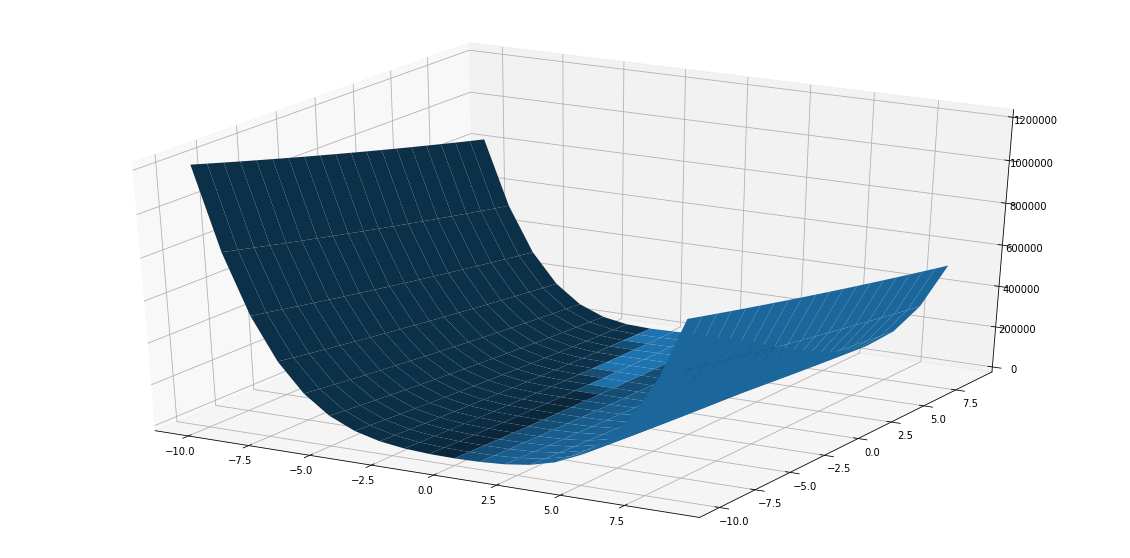

In [12]:
draw_function(x,y,f)